# Logical OR of Two Binary Grids Represented as Quad-Trees

A Binary Matrix is a matrix in which all the elements are either 0 or 1.

Given quadTree1 and quadTree2. quadTree1 represents a n * n binary matrix and quadTree2 represents another n * n binary matrix.

Return a Quad-Tree representing the n * n binary matrix which is the result of logical bitwise OR of the two binary matrixes represented by quadTree1 and quadTree2.

Notice that you can assign the value of a node to True or False when isLeaf is False, and both are accepted in the answer.

A Quad-Tree is a tree data structure in which each internal node has exactly four children. Besides, each node has two attributes:

val: True if the node represents a grid of 1's or False if the node represents a grid of 0's.
isLeaf: True if the node is leaf node on the tree or False if the node has the four children.
class Node {
    public boolean val;
    public boolean isLeaf;
    public Node topLeft;
    public Node topRight;
    public Node bottomLeft;
    public Node bottomRight;
}
We can construct a Quad-Tree from a two-dimensional area using the following steps:

If the current grid has the same value (i.e all 1's or all 0's) set isLeaf True and set val to the value of the grid and set the four children to Null and stop.
If the current grid has different values, set isLeaf to False and set val to any value and divide the current grid into four sub-grids as shown in the photo.
Recurse for each of the children with the proper sub-grid.

If you want to know more about the Quad-Tree, you can refer to the wiki.

Quad-Tree format:

The input/output represents the serialized format of a Quad-Tree using level order traversal, where null signifies a path terminator where no node exists below.

It is very similar to the serialization of the binary tree. The only difference is that the node is represented as a list [isLeaf, val].

If the value of isLeaf or val is True we represent it as 1 in the list [isLeaf, val] and if the value of isLeaf or val is False we represent it as 0.

 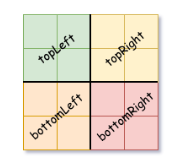

**Example 1:**


Input: quadTree1 = [[0,1],[1,1],[1,1],[1,0],[1,0]]
, quadTree2 = [[0,1],[1,1],[0,1],[1,1],[1,0],null,null,null,null,[1,0],[1,0],[1,1],[1,1]]
Output: [[0,0],[1,1],[1,1],[1,1],[1,0]]
Explanation: quadTree1 and quadTree2 are shown above. You can see the binary matrix which is represented by each Quad-Tree.
If we apply logical bitwise OR on the two binary matrices we get the binary matrix below which is represented by the result Quad-Tree.
Notice that the binary matrices shown are only for illustration, you don't have to construct the binary matrix to get the result tree.

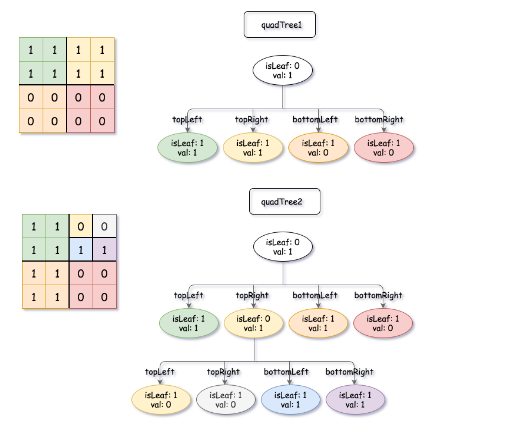

**Example 2:**

Input: quadTree1 = [[1,0]], quadTree2 = [[1,0]]
Output: [[1,0]]
Explanation: Each tree represents a binary matrix of size 1*1. Each matrix contains only zero.
The resulting matrix is of size 1*1 with also zero.
 
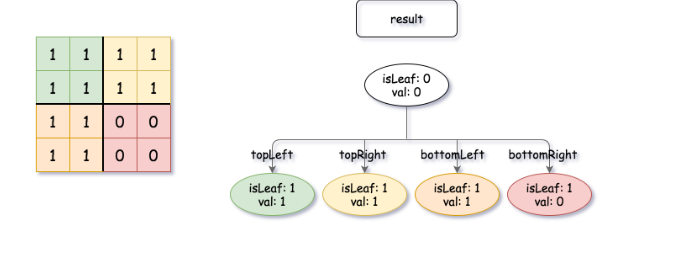

**Constraints:**

- quadTree1 and quadTree2 are both valid Quad-Trees each representing a n * n grid.
- n == 2x where 0 <= x <= 9.

In [2]:
class Node:
    def __init__(self, val=False, isLeaf=False, topLeft=None, topRight=None, bottomLeft=None, bottomRight=None):
        self.val = val
        self.isLeaf = isLeaf
        self.topLeft = topLeft
        self.topRight = topRight
        self.bottomLeft = bottomLeft
        self.bottomRight = bottomRight

class Solution:
    def intersect(self, quadTree1: Node, quadTree2: Node) -> Node:
        if quadTree1.isLeaf:
            if quadTree1.val:
                return Node(True, True)
            return quadTree2
        if quadTree2.isLeaf:
            return self.intersect(quadTree2, quadTree1)

        topLeft = self.intersect(quadTree1.topLeft, quadTree2.topLeft)
        topRight = self.intersect(quadTree1.topRight, quadTree2.topRight)
        bottomLeft = self.intersect(quadTree1.bottomLeft, quadTree2.bottomLeft)
        bottomRight = self.intersect(quadTree1.bottomRight, quadTree2.bottomRight)

        if topLeft.isLeaf and topRight.isLeaf and bottomLeft.isLeaf and bottomRight.isLeaf and \
           topLeft.val == topRight.val == bottomLeft.val == bottomRight.val:
            return Node(topLeft.val, True)
        
        return Node(False, False, topLeft, topRight, bottomLeft, bottomRight)